In [1]:
from math import exp
import matplotlib.pyplot as plt
from math import log10
import numpy as np

In [2]:
x0 = 0
x1 = 2

In [3]:
# Правая часть
def f_mean(t: float, phi: float):
    return exp(1)*phi

In [4]:
# Точное решение
def f_solution(t: float):
    return exp(t)

y_true = f_solution(x1)

print(y_true)

7.38905609893065


In [5]:
def BS(X, x): #поиск пары чисел в упорядоченном массиве, между которыми мог бы заключен x
    low = 0
    high = len(X) - 1
    while low <= high:
        mid = (low + high) // 2
        midVal = X[mid]
        if mid+1<len(X) and (midVal < x and X[mid+1] > x):
            return midVal, X[mid+1], mid+1
        if mid-1>=0 and (midVal > x and X[mid-1] < x):
            return X[mid-1], midVal, mid
        if midVal > x:
            high = mid - 1
        else:
            low = mid + 1
    print('not found :(')
    print(X, x)
    return

In [6]:
def phi(x, X, Y, K, h, tau): #tau - запаздывание
    x-=tau
    if x<x0:
        return exp(x) #предыстория (за рамками интервала)
    if x in X:
        return Y[X.index(x)] #искомый y уже был посчитан
    x_m_1, x_m, m = BS(X, x)
    tet = (x-x_m_1)/(x_m-x_m_1)
    b = [tet- 5/6 * tet**2, 4/6*tet**2, 1/6 * tet**2]
    return Y[m-1]+h*sum([K[m-1][i]*b[i] for i in range(len(b))]) #рассчет y
    
    

In [7]:
def y_find(X, h, Y, K):
    B = [1- 5/6 * 1**2, 4/6*1**2, 1/6 * 1**2]
    x=X[-1]
    K1 = f_mean(x, phi(x, X, Y, K, h, 1))
    K2 = f_mean(x+h/2, phi(x+h/2, X, Y, K, h, 1))
    K3 = f_mean(x+h, phi(x+h, X, Y, K, h, 1))
    y1 = Y[-1]+h*(B[0]*K1 + B[1]*K2 + B[2]*K3)
    K.append([K1, K2, K3])
    X.append(x+h)
    Y.append(y1)
    return(X, Y, K)

In [8]:
def fix_step(x0, h):
    X=[x0]
    Y=[exp(x0)]
    K=[]
    while X[-1]+h<=x1:
        X, Y, K = y_find(X, h, Y, K)
        if X[-1] + h > x1:
            X, Y, K = y_find(X, x1-X[-1], Y, K)
            break
    return(X, Y, abs(Y[-1]-f_solution(x1)))

2.4715457147550524e-07


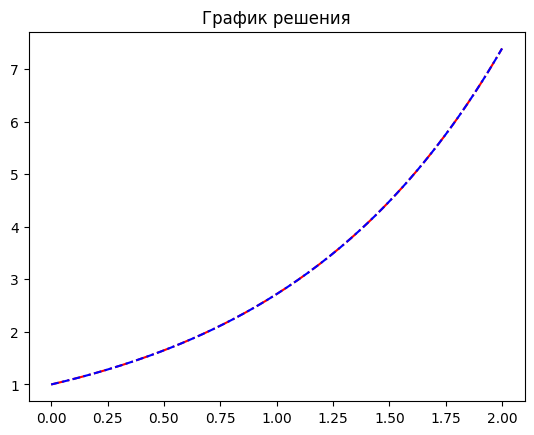

In [9]:
X_, Y_, err = fix_step(x0, 2**(-6))
fig, axs1 = plt.subplots()
axs1.plot(X_, [f_solution(i) for i in X_], 'r', linestyle='-.')
axs1.plot(X_, Y_, 'b', linestyle='--')
axs1.set_title('График решения')
print(err)


[0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625]
[0.00012538998189004502, 1.5757045719766438e-05, 1.9747210275866678e-06, 2.4715457147550524e-07, 3.091385547548953e-08, 3.865449293982692e-09]


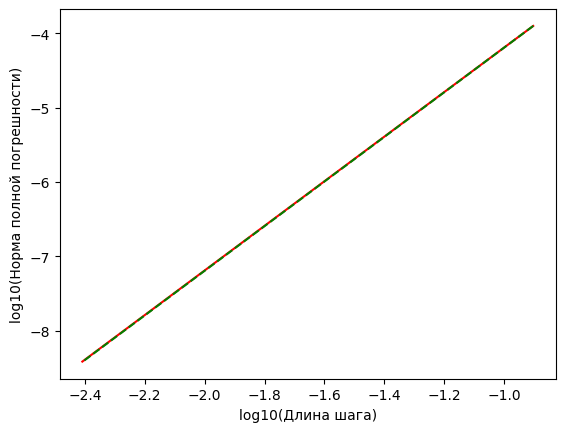

In [10]:
#график зависимости полной погрешности от длины шага
err=[]
h=[]
for i in range(3, 9):
    h_i = 2**(-i)
    h.append(h_i)
    err.append(fix_step(x0, h_i)[2])

fig, axs1 = plt.subplots()
axs1.plot(np.log10(h), np.log10(err), 'r')
axs1.plot(np.log10(h), log10(err[0]) + 3*(np.log10(h)-log10(h[0])), 'g', linestyle='--')
plt.xlabel("log10(Длина шага)")
plt.ylabel("log10(Норма полной погрешности)")
print(h)
print(err)

[0.0375, 0.01875, 0.009375, 0.0046875, 0.00234375, 0.001171875]
[0.001132981012728962, 9.459286996893468e-05, 7.181884063633959e-05, 2.9946906062505718e-05, 4.5045989596204095e-06, 3.754280335499516e-07]


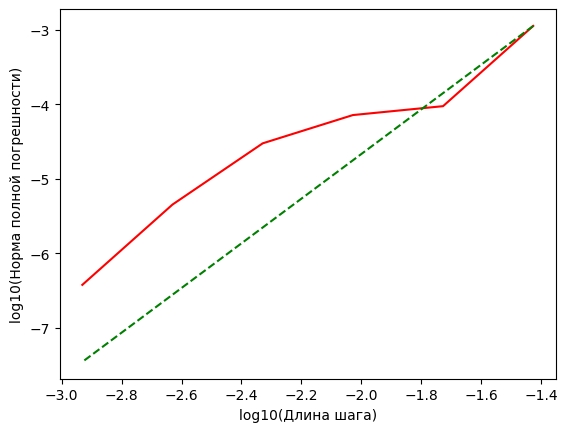

In [11]:
#график зависимости полной погрешности от длины шага
err=[]
h=[]
for i in range(3, 9):
    h_i = 0.3*2**(-i)
    h.append(h_i)
    err.append(fix_step(x0, h_i)[2])

fig, axs1 = plt.subplots()
axs1.plot(np.log10(h), np.log10(err), 'r')
axs1.plot(np.log10(h), log10(err[0]) + 3*(np.log10(h)-log10(h[0])), 'g', linestyle='--')
plt.xlabel("log10(Длина шага)")
plt.ylabel("log10(Норма полной погрешности)")
print(h)
print(err)